In [1]:
import pandas as pd

In [10]:

df = pd.read_csv('otu_taxa_table.csv')

In [11]:
df

,OTU_ID,ekb-w1,grd-w1,ekb-w2,grd-w2,taxonomy
0,OTU24,8133,9240,18,5,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...
1,OTU15,85,4,3812,5707,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...
2,OTU36,4215,2843,487,1062,k__Bacteria;p__Bacteroidetes;c__Flavobacteriia...
3,OTU35,1872,4210,109,172,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...
4,OTU33,94,60,2850,2803,k__Bacteria;p__Actinobacteria;c__Actinobacteri...
...,...,...,...,...,...,...
1194,OTU1031,0,0,0,3,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...
1195,OTU1021,0,3,0,0,k__Bacteria;p__Bacteroidetes;c__Flavobacteriia...
1196,OTU950,0,3,0,0,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...
1197,OTU878,0,3,0,0,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...


In [19]:
print(df['taxonomy'][0])

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae;g__Acinetobacter;s__johnsonii


In [21]:
df["Kingdom"] = None
df["Phylum"] = None
df["Class"] = None
df["Order"] = None
df["Family"] = None
df["Genus"] = None
df["Species"] = None

In [79]:
for ind,instance in enumerate(df['taxonomy']):
    taxo = instance
    array_of_taxo = taxo.split(';')
    for thing in array_of_taxo:
        divide = thing.split('__')
        if divide[0] == 'k':
            df.at[ind,'Kingdom'] = str(divide[1])
        if divide[0] == 'p':
            df.at[ind,'Phylum'] = str(divide[1])
        if divide[0] == 'c':
            df.at[ind,'Class'] = str(divide[1])
        if divide[0] == 'o':
            df.at[ind,'Order'] = str(divide[1])
        if divide[0] == 'f':
            df.at[ind,'Family'] = str(divide[1])
        if divide[0] == 'g':
            df.at[ind,'Genus'] = str(divide[1])
        if divide[0] == 's':
            df.at[ind,'Species'] = str(divide[1])
        

In [80]:
df

,OTU_ID,ekb-w1,grd-w1,ekb-w2,grd-w2,taxonomy,Kingdom,Phylum,Class,Order,Family,Genus,Species
0,OTU24,8133,9240,18,5,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Moraxellaceae,Acinetobacter,johnsonii
1,OTU15,85,4,3812,5707,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Bacteria,Proteobacteria,Gammaproteobacteria,Oceanospirillales,Oceanospirillaceae,,
2,OTU36,4215,2843,487,1062,k__Bacteria;p__Bacteroidetes;c__Flavobacteriia...,Bacteria,Bacteroidetes,Flavobacteriia,Flavobacteriales,Flavobacteriaceae,Flavobacterium,
3,OTU35,1872,4210,109,172,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Rhodobacter,
4,OTU33,94,60,2850,2803,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,Bacteria,Actinobacteria,Actinobacteria,Actinomycetales,Microbacteriaceae,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,OTU1031,0,0,0,3,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,None,None
1195,OTU1021,0,3,0,0,k__Bacteria;p__Bacteroidetes;c__Flavobacteriia...,Bacteria,Bacteroidetes,Flavobacteriia,Flavobacteriales,Flavobacteriaceae,None,None
1196,OTU950,0,3,0,0,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,None,None,None
1197,OTU878,0,3,0,0,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,None,None


In [82]:
df.sort_values(['ekb-w1','grd-w1','ekb-w2','grd-w2'], ascending=[False, False, False, False])

,OTU_ID,ekb-w1,grd-w1,ekb-w2,grd-w2,taxonomy,Kingdom,Phylum,Class,Order,Family,Genus,Species
0,OTU24,8133,9240,18,5,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Moraxellaceae,Acinetobacter,johnsonii
2,OTU36,4215,2843,487,1062,k__Bacteria;p__Bacteroidetes;c__Flavobacteriia...,Bacteria,Bacteroidetes,Flavobacteriia,Flavobacteriales,Flavobacteriaceae,Flavobacterium,
3,OTU35,1872,4210,109,172,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Rhodobacter,
11,OTU88,1168,1300,2,0,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Pseudomonas,
18,OTU56,1135,966,5,3,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Bacteria,Proteobacteria,Gammaproteobacteria,Aeromonadales,Aeromonadaceae,Tolumonas,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,OTU1125,0,0,0,3,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Bacteria,Proteobacteria,Gammaproteobacteria,Alteromonadales,OM60,None,None
1167,OTU1149,0,0,0,3,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Porphyromonadaceae,Paludibacter,
1182,OTU1110,0,0,0,3,k__Bacteria;p__GN02;c__BD1-5;o__;f__;g__;s__,Bacteria,GN02,BD1-5,,,,
1194,OTU1031,0,0,0,3,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,None,None


In [26]:
print(df['Phylum'].unique())

['Proteobacteria' 'Bacteroidetes' 'Actinobacteria' 'Cyanobacteria' None
 'Firmicutes' 'Fusobacteria' 'Planctomycetes' 'Verrucomicrobia'
 'Synergistetes' 'Tenericutes' 'TM6' 'Acidobacteria' 'TM7' 'WWE1'
 'Chloroflexi' 'OD1' 'Thermotogae' 'WS3' 'Chlorobi' 'GN02' 'WPS-2' 'SR1'
 'SAR406' 'Fibrobacteres' '' 'Caldiserica']


In [27]:
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.core.properties import value
from bokeh.palettes import Spectral
import itertools

In [36]:
sum(df['ekb-w1'][df['Kingdom'] != 'Bacteria'])

439

In [37]:
sum(df['ekb-w1'][df['Kingdom'] == 'Bacteria'])

49977

In [47]:
import matplotlib.pyplot as plt
import numpy as np

In [108]:
def plot_rel_abundances(taxa,num):
    labels = ['ekb-w1', 'grd-w1', 'ekb-w2', 'grd-w2']

    unique_things = df[taxa].unique()
    unique_things = unique_things[unique_things != np.array(None)]
    unique_things = unique_things[unique_things != '']
    unique_things = np.append(unique_things, 'Unclassified')

    y1sum = 0
    y2sum = 0
    y3sum = 0
    y4sum = 0
    y1other = 0
    y2other = 0
    y3other = 0
    y4other = 0
    
    fig = plt.figure()
    ax = plt.subplot(111)

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    for ind,thing in enumerate(unique_things):
        if ind < num:
            if thing != 'Unclassified':
                y1 = sum(df['ekb-w1'][df[taxa] == thing])/sum(df['ekb-w1'])
                y2 = sum(df['grd-w1'][df[taxa] == thing]/sum(df['grd-w1']))
                y3 = sum(df['ekb-w2'][df[taxa] == thing]/sum(df['ekb-w2']))
                y4 = sum(df['grd-w2'][df[taxa] == thing]/sum(df['grd-w2']))
            else:
                y1 = 1.0-y1sum 
                y2 = 1.0-y2sum
                y3 = 1.0-y3sum
                y4 = 1.0-y4sum
            ax.bar(labels, np.array([y1,y2,y3,y4]), bottom=np.array([y1sum,y2sum,y3sum,y4sum]))
            y1sum += y1
            y2sum += y2
            y3sum += y3
            y4sum += y4
        else:
            unique_things = np.append(unique_things[0:num],['Other','Unclassified'])
            if thing != 'Unclassified':
                y1other += sum(df['ekb-w1'][df[taxa] == thing])/sum(df['ekb-w1'])
                y2other += sum(df['grd-w1'][df[taxa] == thing]/sum(df['grd-w1']))
                y3other += sum(df['ekb-w2'][df[taxa] == thing]/sum(df['ekb-w2']))
                y4other += sum(df['grd-w2'][df[taxa] == thing]/sum(df['grd-w2']))
                continue
            else:
                y1 = y1other
                y2 = y2other
                y3 = y3other
                y4 = y4other
                ax.bar(labels, np.array([y1,y2,y3,y4]), bottom=np.array([y1sum,y2sum,y3sum,y4sum]))
                y1sum += y1
                y2sum += y2
                y3sum += y3
                y4sum += y4
                y1 = 1.0-y1sum 
                y2 = 1.0-y2sum
                y3 = 1.0-y3sum
                y4 = 1.0-y4sum
                ax.bar(labels, np.array([y1,y2,y3,y4]), bottom=np.array([y1sum,y2sum,y3sum,y4sum]))
    # plot bars in stack manner
    ax.set_ylabel("Relative")
    # Put a legend to the right of the current axis
    ax.legend(unique_things, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

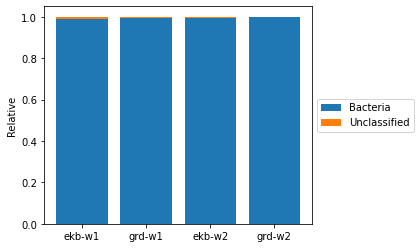

In [109]:
plot_rel_abundances('Kingdom',100)

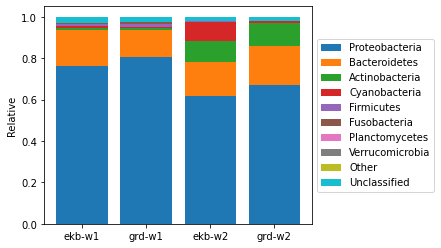

In [115]:
plot_rel_abundances('Phylum',8)

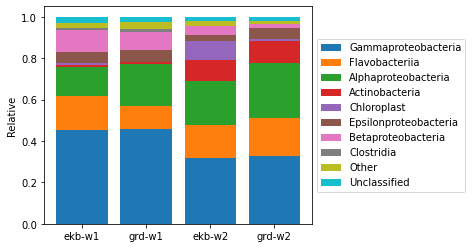

In [114]:
plot_rel_abundances('Class',8)

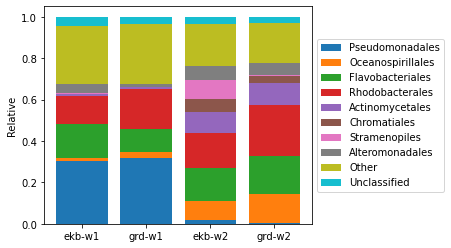

In [116]:
plot_rel_abundances('Order',8)

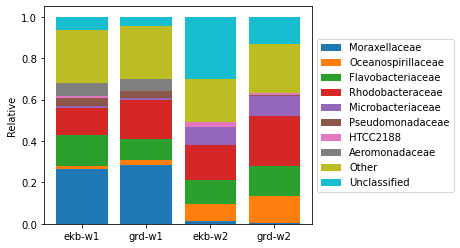

In [117]:
plot_rel_abundances('Family',8)

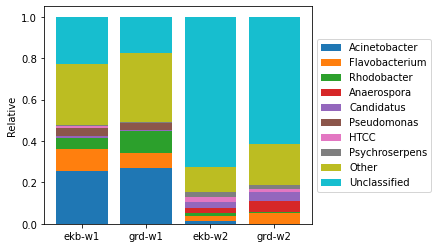

In [118]:
plot_rel_abundances('Genus',8)

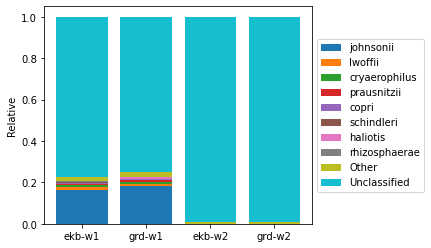

In [119]:
plot_rel_abundances('Species',8)

In [81]:
import seaborn as sns